In [1]:
import logging

import xarray as xr  # xarray for data manipulation

import qnt.data as qndata     # functions for loading data
import qnt.backtester as qnbt # built-in backtester
import qnt.ta as qnta         # technical analysis library
import qnt.stats as qnstats   # statistical functions

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

np.seterr(divide = "ignore")

from qnt.ta.macd import macd
from qnt.ta.rsi  import rsi
from qnt.ta.stochastic import stochastic_k, stochastic, slow_stochastic

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier

#El modelo usado es árbol aleatorio permite obtener predicciones más acertadas en modelos estocásticos, pero además no se va a ir por tendencias extremas sino que va a ser más moderado.

In [2]:
import logging

import xarray as xr  # xarray for data manipulation

import qnt.data as qndata     # functions for loading data
import qnt.backtester as qnbt # built-in backtester
import qnt.ta as qnta         # technical analysis library
import qnt.stats as qnstats   # statistical functions

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

np.seterr(divide = "ignore")

from qnt.ta.macd import macd
from qnt.ta.rsi  import rsi
from qnt.ta.stochastic import stochastic_k, stochastic, slow_stochastic

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier

#El modelo usado es árbol aleatorio permite obtener predicciones más acertadas en modelos estocásticos, pero además no se va a ir por tendencias extremas sino que va a ser más moderado.

100% (367973 of 367973) |################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (79197 of 79197) |##################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (2092580 of 2092580) |##############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 1/1 0s
Data loaded 1s
['NAS:AAL' 'NAS:AAPL' 'NAS:ABNB' 'NAS:ACGL' 'NAS:ADBE' 'NAS:ADI' 'NAS:ADP'
 'NAS:ADSK' 'NAS:AEP' 'NAS:AKAM' 'NAS:ALGN' 'NAS:AMAT' 'NAS:AMD'
 'NAS:AMGN' 'NAS:AMZN' 'NAS:ANSS' 'NAS:APA' 'NAS:AVGO' 'NAS:AXON'
 'NAS:BIIB' 'NAS:BKNG' 'NAS:BKR' 'NAS:CDNS' 'NAS:CDW' 'NAS:CEG' 'NAS:CHRW']


asset,NAS:AAL,NAS:AAPL,NAS:ABNB,NAS:ACGL,NAS:ADBE,NAS:ADI,NAS:ADP,NAS:ADSK,NAS:AEP,NAS:AKAM,...,NAS:APA,NAS:AVGO,NAS:AXON,NAS:BIIB,NAS:BKNG,NAS:BKR,NAS:CDNS,NAS:CDW,NAS:CEG,NAS:CHRW
time,,,,,,,,,,,,,,,,,,,,,
2020-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-31,0.143845,-0.020030,-0.076572,-0.081199,-0.266023,-0.072554,0.055300,0.116794,0.101628,0.164671,...,-0.117945,0.299432,0.258332,-0.243230,-0.168453,0.253788,-0.065466,0.286603,0.544005,-0.214498
2025-02-03,0.090432,-0.132496,-0.108737,-0.078502,-0.253000,-0.170161,0.100157,0.056200,0.135289,0.099523,...,-0.181018,0.231572,0.269174,-0.267718,-0.198295,0.334892,-0.060970,0.270101,0.609674,-0.256926
2025-02-04,0.105387,-0.068328,-0.082237,-0.088984,-0.236719,-0.153932,0.067596,0.059558,0.083713,0.164757,...,-0.044782,0.289791,0.273901,-0.253749,-0.207059,0.364382,-0.047847,0.283206,0.590004,-0.232494


Run the last iteration...


100% (44115 of 44115) |##################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (8930364 of 8930364) |##############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 1/1 2s
Data loaded 2s


100% (667400 of 667400) |################| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 1/1 2s
Data loaded 2s
Output cleaning...
fix uniq
ffill if the current price is None...
Check liquidity...
WARNING! Strategy trades non-liquid assets.
Fix liquidity...
Ok.
Check missed dates...
Ok.
Normalization...
Output cleaning is complete.
Write output: /root/fractions.nc.gz
State saved.
---
Run First Iteration...


100% (44115 of 44115) |##################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (9037908 of 9037908) |##############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 1/1 2s
Data loaded 2s
---
Run all iterations...
Load data...


100% (44115 of 44115) |##################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (13049888 of 13049888) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 1/8 1s


100% (13049888 of 13049888) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 2/8 1s


100% (13049888 of 13049888) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 3/8 2s


100% (13049864 of 13049864) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 4/8 3s


100% (13049796 of 13049796) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 5/8 4s


100% (13049796 of 13049796) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 6/8 5s


100% (13049796 of 13049796) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 7/8 5s


100% (13049864 of 13049864) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 8/8 6s
Data loaded 6s


100% (44115 of 44115) |##################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (12967240 of 12967240) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 1/7 1s


100% (12967236 of 12967236) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 2/7 2s


100% (12967236 of 12967236) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 3/7 2s


100% (12967212 of 12967212) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 4/7 3s


100% (12967132 of 12967132) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 5/7 4s


100% (12967132 of 12967132) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 6/7 5s


100% (12967212 of 12967212) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 7/7 6s
Data loaded 6s
Backtest...


100% (44115 of 44115) |##################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (13069800 of 13069800) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 1/7 1s


100% (13069796 of 13069796) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 2/7 2s


100% (13069796 of 13069796) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 3/7 2s


100% (13069772 of 13069772) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 4/7 3s


100% (13069692 of 13069692) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 5/7 4s


100% (13069692 of 13069692) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 6/7 5s


100% (13069772 of 13069772) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 7/7 6s
Data loaded 6s
Output cleaning...
fix uniq
ffill if the current price is None...
Check liquidity...
WARNING! Strategy trades non-liquid assets.
Fix liquidity...
Ok.
Check missed dates...
Ok.
Normalization...
Output cleaning is complete.
Write output: /root/fractions.nc.gz
State saved.
---
Analyze results...
Check...
Check liquidity...
Ok.
Check missed dates...
Ok.
Check the sharpe ratio...
Period: 2006-01-01 - 2025-02-06
Sharpe Ratio = 0.7665880156414984
Ok.
---
Align...
Calc global stats...
---
Calc stats per asset...
Build plots...
---
Select the asset (or leave blank to display the overall stats):


interactive(children=(Combobox(value='', description='asset', options=('', 'NAS:AAL', 'NAS:AAPL', 'NAS:ABNB', …

100% (5057 of 5057) |####################| Elapsed Time: 0:02:29 Time:  0:02:29


<xarray.DataArray 'stocks_nasdaq100' (time: 5057, asset: 280)> Size: 11MB
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00504315, 0.        , ..., 0.00593971, 0.00369831,
        0.00392245],
       [0.        , 0.0034375 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00611777, 0.00828448, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00722892, 0.00887762, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00724185, 0.00761643, ..., 0.        , 0.        ,
        0.        ]])
Coordinates:
  * time     (time) datetime64[ns] 40kB 2005-01-03 2005-01-04 ... 2025-02-06
  * asset    (asset) <U10 11kB 'NAS:AAL' 'NAS:AAPL' ... 'NYS:RHT' 'NYS:TEVA'


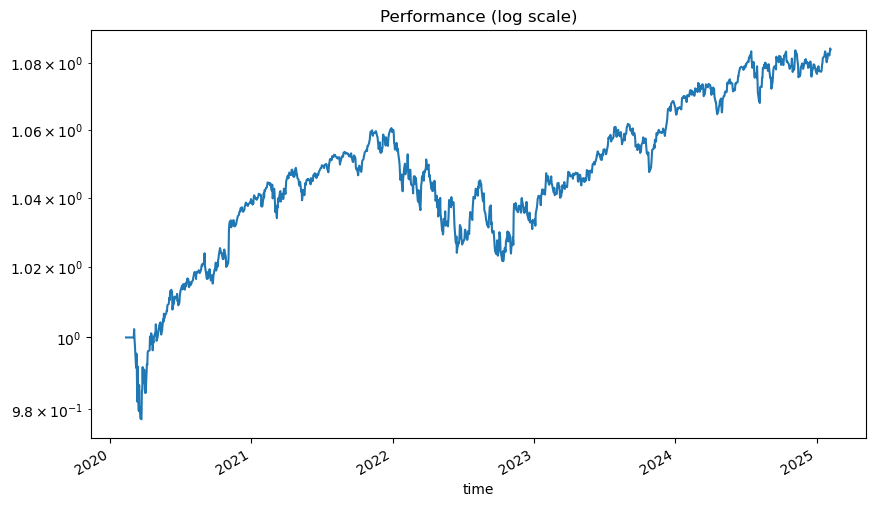

Sharpe Ratio: <xarray.DataArray (time: 1254, field: 11)> Size: 110kB
array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            inf,             nan,             nan, ...,
                    inf, 4.13385466e+002,             nan],
       [            inf,             nan,             nan, ...,
                    inf, 1.12509132e+003,             nan],
       ...,
       [3.28541576e+078, 6.38486277e-001, 1.51919971e+004, ...,
                    inf, 1.16236411e+003, 1.01129175e+291],
       [3.29493369e+078, 6.47685877e-001, 1.51779052e+004, ...,
                    inf, 1.16278869e+003, 1.01709009e+291],
       [3.30443224e+078, 6.44554538e-001, 1.51638189e+004, ...,
                    inf, 1.16321107e+003, 1.02248398e+291]])
Coordinates:
  * time     (time) datetime64[ns] 10kB 2020-02-12 2020-02-13 ... 2025-02-06
  * field    (field) object 88B 'equity' ... 'avg_holding_time'
R2: -0.9918530473339

/usr/local/lib/python3.10/site-packages/xarray/core/computation.py:821: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/site-packages/xarray/core/computation.py:821: RuntimeWarning:

overflow encountered in power



In [3]:
np.seterr(divide="ignore")

# Cargar datos
assets = ['NAS:AAL', 'NAS:AAPL', 'NAS:ABNB', 'NAS:ACGL', 'NAS:ADBE', 'NAS:ADI', 'NAS:ADP',
 'NAS:ADSK', 'NAS:AEP', 'NAS:AKAM', 'NAS:ALGN', 'NAS:AMAT', 'NAS:AMD',
 'NAS:AMGN', 'NAS:AMZN', 'NAS:ANSS', 'NAS:APA', 'NAS:AVGO', 'NAS:AXON',
 'NAS:BIIB', 'NAS:BKNG', 'NAS:BKR', 'NAS:CDNS', 'NAS:CDW', 'NAS:CEG', 'NAS:CHRW']

#Estas son las 20 acciones analizadas, estas cubren diferentes campos, que varian entre mercados y que son las líderes del mercado, lo que las hace más fuertes.

data = qndata.stocks.load_spx_data(tail=365 * 5, assets=assets)

print(data.coords["asset"].values)



# Función para generar características
def get_features(data):
    close = data.sel(field="close")
    high = data.sel(field="high")
    low = data.sel(field="low")

    trend = qnta.roc(qnta.lwma(close, 60), 1)
    macd_signal = qnta.macd(close)[1]
    volatility = qnta.tr(high, low, close) / close
    volatility_annual = volatility.rolling(time=250).std()
    stochastic_k, stochastic_d = qnta.stochastic(high, low, close, 14)
    rsi = qnta.rsi(close)
    log_price = np.log(close)

    #RSI y log price son dos nuevas variables que agregan mas datos a la apertura y la fuerza de un movimiento para poder ayudar a la predicción.

    features = xr.concat(
        [trend, macd_signal, volatility, volatility_annual, stochastic_d, rsi, log_price],
        pd.Index(["trend", "macd_signal", "volatility", "volatility_annual", "stochastic_d", "rsi", "log_price"], name="field"),
    )
    return features.transpose("time", "field", "asset")

my_features = get_features(data)
display(my_features.sel(field="trend").to_pandas())
# Target: subir o bajar
def get_target_classes(data):
    price = data.sel(field="close")
    future_price = qnta.shift(price, -1)
    return xr.where(future_price > price, 1, 0)

# Modelo basado en Random Forest
def get_model():
    return RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenamiento de modelos
def train_model(data):
    features = get_features(data)
    targets = get_target_classes(data)
    models = {}
    for asset in data.coords["asset"].values:
        target_asset = targets.sel(asset=asset).dropna(dim="time", how="any")
        features_asset = features.sel(asset=asset).dropna(dim="time", how="any")
        target_df, feature_df = xr.align(target_asset, features_asset, join="inner")
        if len(target_df.time) < 10:
            continue
        model = get_model()
        model.fit(feature_df.values, target_df.values)
        models[asset] = model
    return models

# Predicción de pesos
def predict_weights(models, data):
    features = get_features(data)
    weights = xr.zeros_like(data.sel(field="close"))
    for asset in data.coords["asset"].values:
        if asset in models:
            model = models[asset]
            features_asset = features.sel(asset=asset).dropna(dim="time", how="any")
            if len(features_asset.time) < 1:
                continue
            # Predicción probabilística
            probas = model.predict_proba(features_asset.values)[:, 1]
            weights.loc[dict(asset=asset, time=features_asset.time.values)] = probas
    # Normaliza los pesos para construir un portafolio diversificado
    weights = weights / weights.sum(dim="asset")
    return weights

# Backtesting
weights = qnbt.backtest_ml(
    train                         = train_model,  # Función para entrenar modelos
    predict                       = predict_weights,  # Función para predecir pesos
    train_period                  = 2 * 365,  # Período de entrenamiento en días calendario
    retrain_interval              = 10 * 365,  # Intervalo de reentrenamiento en días calendario
    retrain_interval_after_submit = 1,  # Intervalo de reentrenamiento después de la evaluación
    predict_each_day              = False,  # No es necesario predecir todos los días
    competition_type              = "stocks_nasdaq100",  # Tipo de competencia
    lookback_period               = 365,  # Período de datos necesarios para generar la predicción
    start_date                    = "2005-01-01",  # Fecha de inicio del backtest
    analyze                       = True,  # Realizar análisis de resultados
    build_plots                   = True  # Generar gráficos
)

# Imprimir resultados básicos
print(weights)

result = weights


# Métricas y visualización
statistics = qnstats.calc_stat(data, result)  # Usar `result` correctamente
performance = statistics.to_pandas()["equity"]
performance.plot(logy=True, title="Performance (log scale)", figsize=(10, 6))
plt.show()

sharpe_ratio = qnstats.calc_sharpe_ratio_annualized(statistics)
print("Sharpe Ratio:", sharpe_ratio)

# Métricas del modelo
target = get_target_classes(data)
aligned_target, aligned_result = xr.align(target, result, join="inner")
r2 = r2_score(aligned_target.values.flatten(), aligned_result.values.flatten())
explained_var = explained_variance_score(aligned_target.values.flatten(), aligned_result.values.flatten())
mae = mean_absolute_error(aligned_target.values.flatten(), aligned_result.values.flatten())

print(f"R2: {r2}, Explained Variance: {explained_var}, MAE: {mae}")
print("done")

In [4]:
#